### Predict CO2 Emissions from Vehicles Using Machine Learning

The Team Members Group 15
1. Dukundimana Toussaint

2. Ziaurrahman Hemat

3. GAI AWUOU KWAI ALIER

4. Abdelrazig Mustafa

#### Importing necessary libaries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading dataset from Kaggle
link [here](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?resource=download)



Data Description
Model

4WD/4X4 = Four-wheel drive
AWD = All-wheel drive

FFV = Flexible-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase

Transmission

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears

Fuel type

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas

Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg).


CO2 Emissions

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

## Loading of data

In [36]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data /CO2 Emissions_Canada.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
# df = pd.read_csv('CO2 Emissions_Canada.csv')
# df.head()

## Data Cleaning

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## rename Columns

In [39]:
# Rename columns
df.rename(columns={
    'Engine Size(L)': 'Engine_Size_L',
    'Cylinders': 'Cylinders',
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb_mpg',
    'CO2 Emissions(g/km)': 'CO2_Emissions_g_km'
}, inplace=True)

In [40]:
# check for missed value
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine_Size_L,0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel_Consumption_City,0
Fuel_Consumption_Hwy,0
Fuel_Consumption_Comb,0


In [41]:
# check for duplicates
df.duplicated().sum()

1103

In [42]:
# check for percentage of duplicates in our data
print(f'{df.duplicated().sum() / len(df) * 100:.2f}%')

14.94%


### handling of Duplicates

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
# check again for duplicates
df.duplicated().sum()

0

In [45]:
df

,Make,Model,Vehicle Class,Engine_Size_L,Cylinders,Transmission,Fuel Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


### checking Outliers

In [46]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Select numerical columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Define number of rows and columns for subplots
num_cols = 3  # Number of plots per row
num_rows = len(numerical_cols) // num_cols + (len(numerical_cols) % num_cols > 0)

# Create subplots figure
fig = make_subplots(rows=num_rows, cols=num_cols,
                    subplot_titles=[f'Boxplot of {col}' for col in numerical_cols])

# Add boxplots to each subplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols + 1
    col_index = i % num_cols + 1
    fig.add_trace(go.Box(y=df[col], name=col), row=row, col=col_index)

# Update layout
fig.update_layout(height=num_rows * 280, width=1000, showlegend=False,
                  title_text="Boxplots of Numerical Columns")

# Show plot
fig.show()


In [47]:
df

,Make,Model,Vehicle Class,Engine_Size_L,Cylinders,Transmission,Fuel Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


## Exploratory Data Analysis (EDA)

In [48]:
df.describe(include=[np.number])

,Engine_Size_L,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


The dataset summary provides statistical details of a vehicle dataset with 6,282 entries, focusing on engine size, number of cylinders, fuel consumption, and CO2 emissions:


Engine Size (L): Averages at 3.16 L with a range from 0.9 L to 8.4 L.

Cylinders: Averages 5.62, ranging from 3 to 16.

Fuel Consumption (City, Hwy, Comb in L/100 km): Averages are 12.61 (city), 9.07 (highway), and 11.02 (combined).

Fuel Consumption (Comb mpg): Averages at 27.41 mpg, ranging from 11 to 69 mpg.

CO2 Emissions (g/km): Averages at 251.16 g/km, with a range from 96 to 522 g/km.
Overall, the data captures a wide range of vehicle performance and emissions characteristics

In [49]:
# Selecting only object (categorical) columns
object_columns_df = df.select_dtypes(include=[object])

# Display the first few rows of the object columns
object_columns_df.head()

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


In [50]:
# prompt: make df of object column and  total number of thier Unique values

object_cols_unique_counts = object_columns_df.nunique()
object_cols_unique_df = pd.DataFrame({'Column': object_cols_unique_counts.index,
                                      'Unique Values Count': object_cols_unique_counts.values})
object_cols_unique_df


,Column,Unique Values Count
0,Make,42
1,Model,2053
2,Vehicle Class,16
3,Transmission,27
4,Fuel Type,5


In [51]:
# checking unique number of objet values
for col in object_columns_df.columns:
    unique_values = object_columns_df[col].unique()
    num_unique = len(unique_values)
    print(f'Column: {col}')
    print(f'Number of Unique Values: {num_unique}')
    print(f'Unique Values: {unique_values}')
    print('-' * 50)

Column: Make
Number of Unique Values: 42
Unique Values: ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
--------------------------------------------------
Column: Model
Number of Unique Values: 2053
Unique Values: ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
--------------------------------------------------
Column: Vehicle Class
Number of Unique Values: 16
Unique Values: ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN

Vehicle Column have many unique values of 16 , Transimssion Column have also many Unique values of 27 , Make has so many 42  and Model has unique values of  2053 may require feature engineering to transform its categorical data into numerical representations suitable for Modelling Process.

In [52]:
# since the transimmission and model can't be processed easly we chose to drop it

df.drop(['Transmission', 'Model'], axis=1, inplace=True)

### Distribution of Numeric data

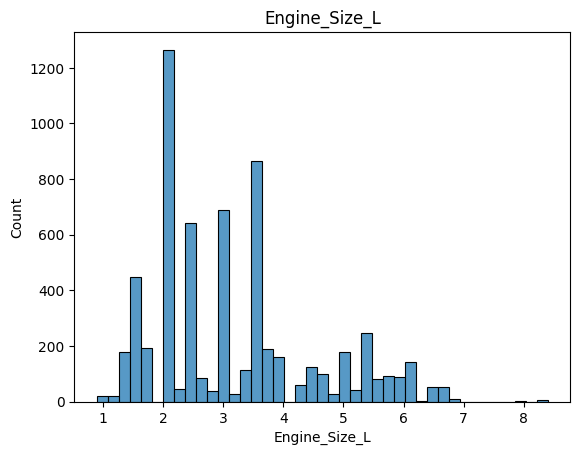

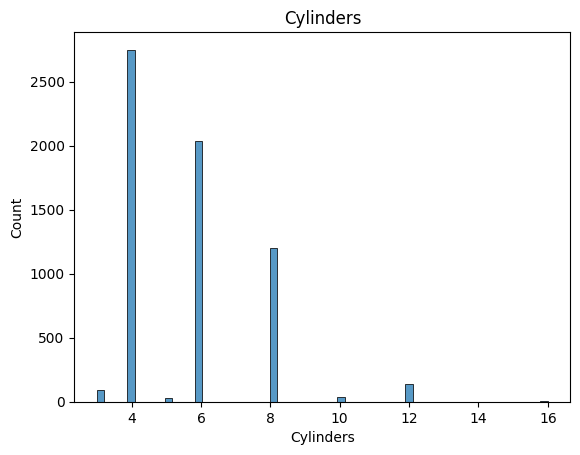

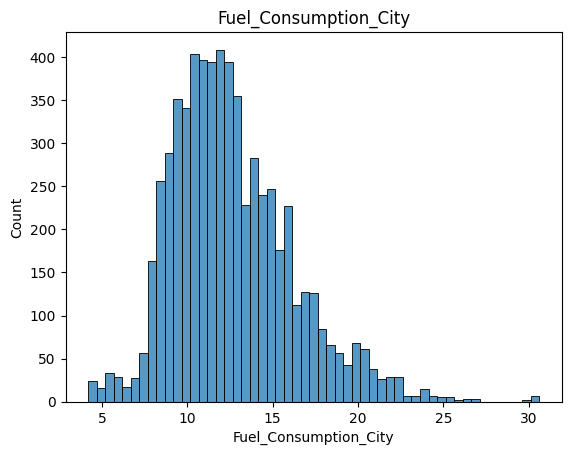

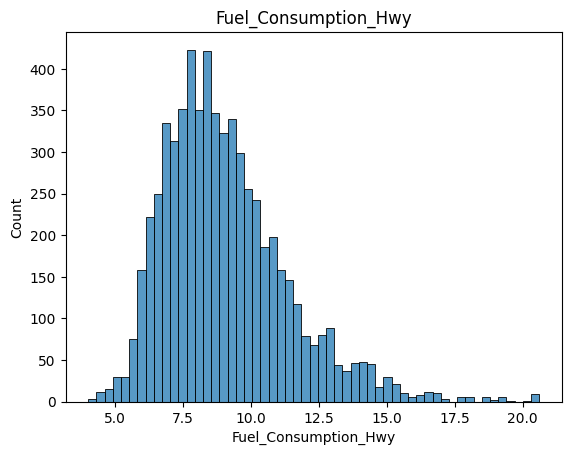

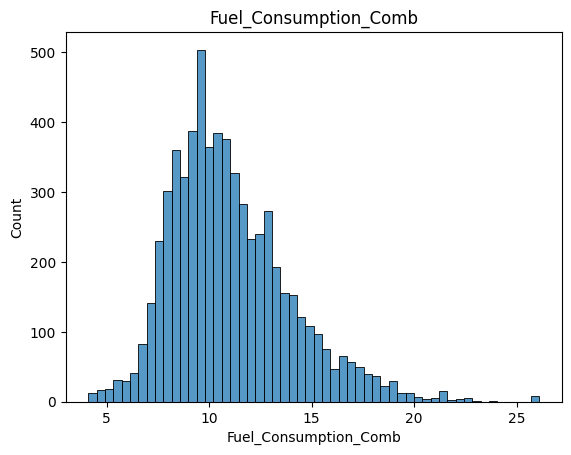

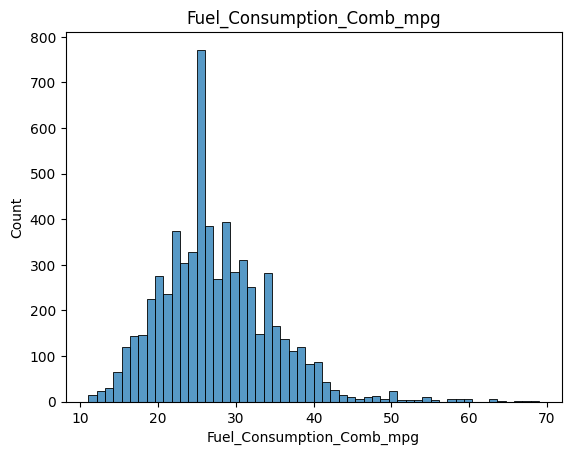

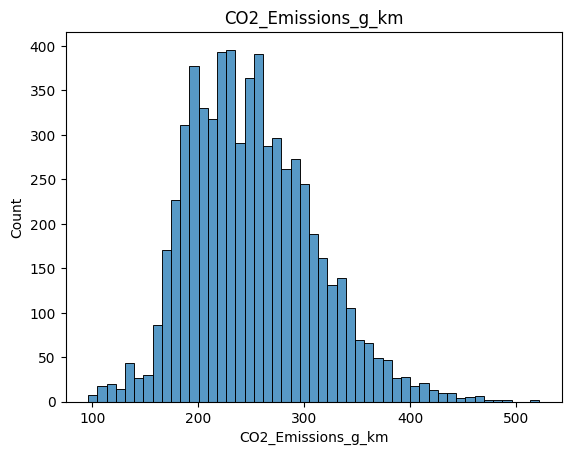

In [53]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create histograms for each numerical column
for col in numerical_cols:
  sns.histplot(df[col])
  plt.title(col)
  plt.show()

These Histgrom show the Distribution and Most features are tends to be Normal distributed except Engine_size_L and Cylinders which may require to be Normalized to contribute  equally and efficient  in Modeling Process

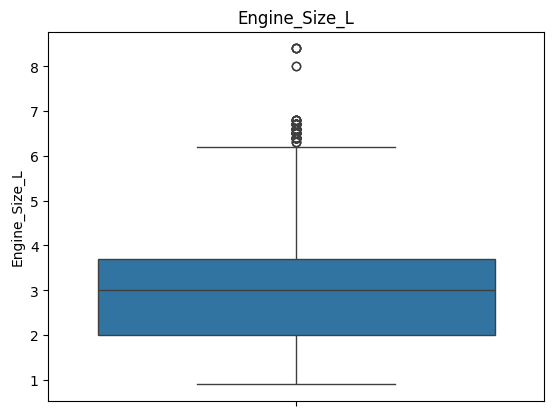

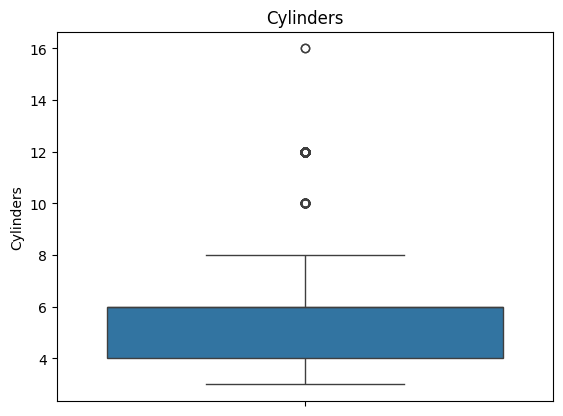

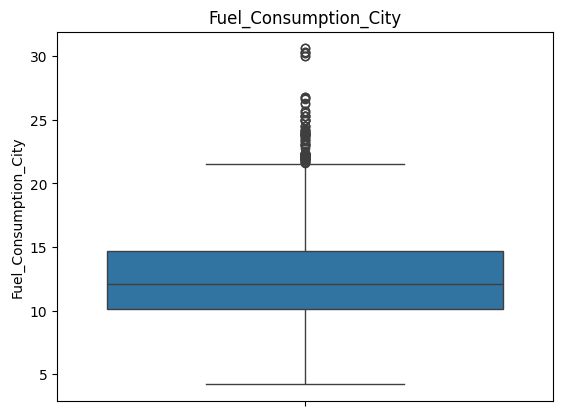

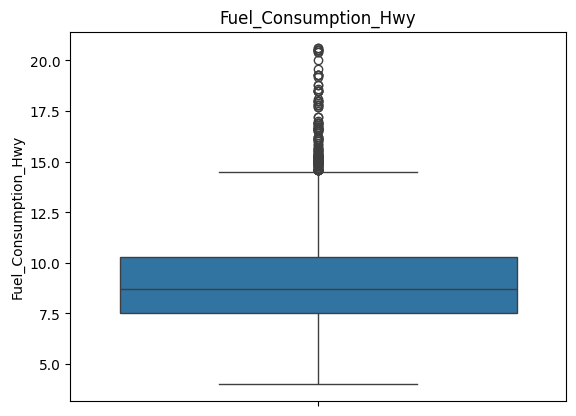

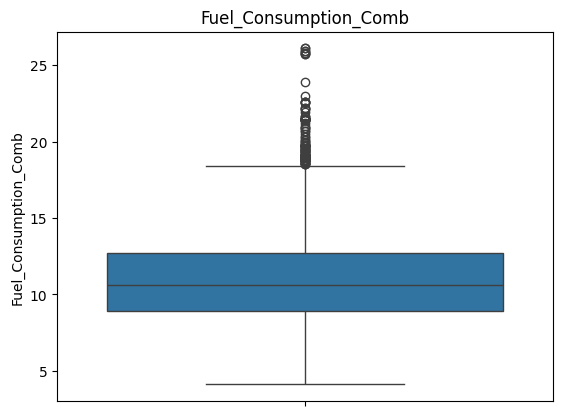

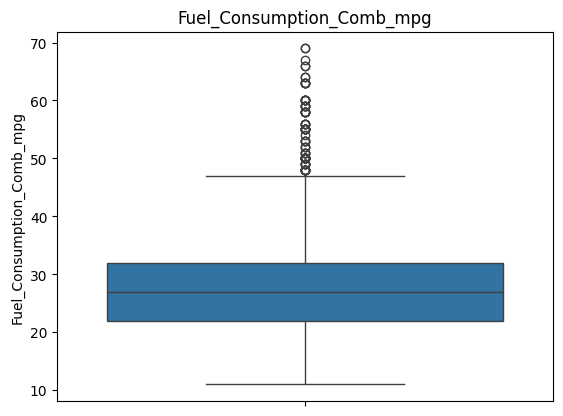

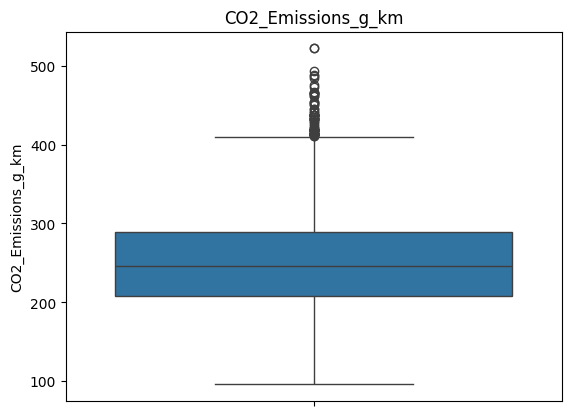

In [54]:
# checking of outliers
for col in numerical_cols:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

### Remove of Outlirers

In [55]:
# # remove of outliers
# for col in numerical_cols:
#   Q1 = df[col].quantile(0.25)
#   Q3 = df[col].quantile(0.75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR
#   df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

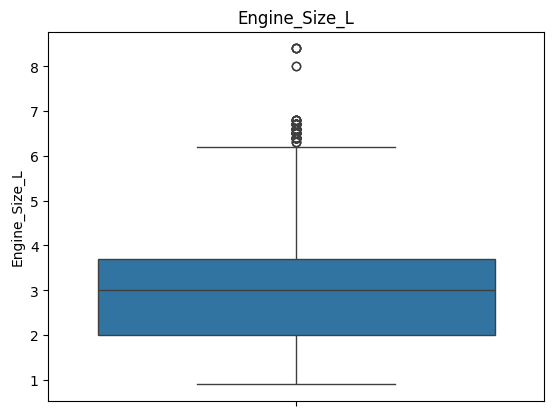

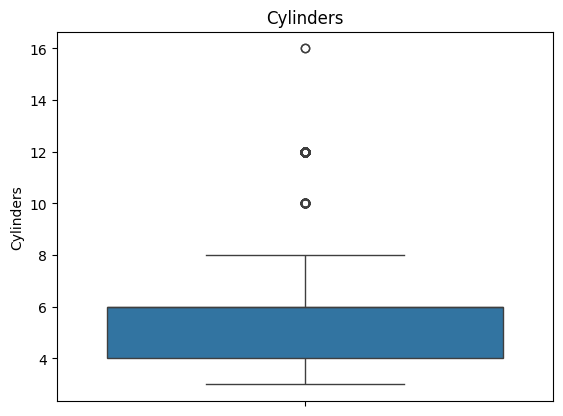

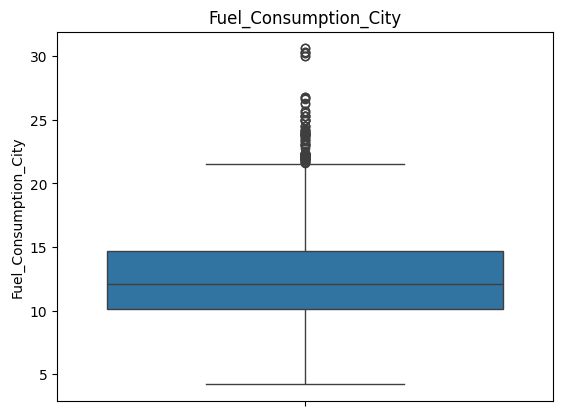

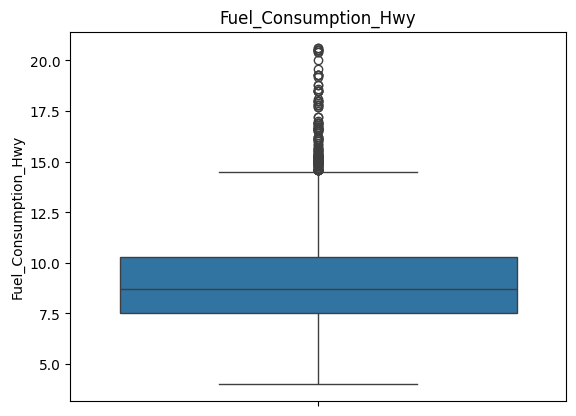

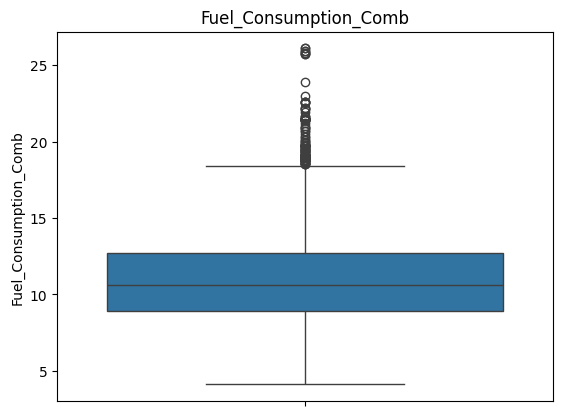

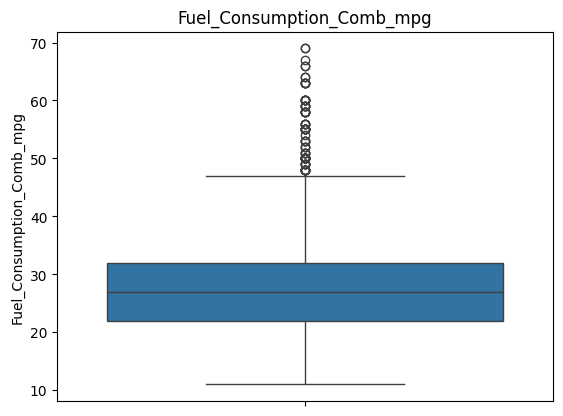

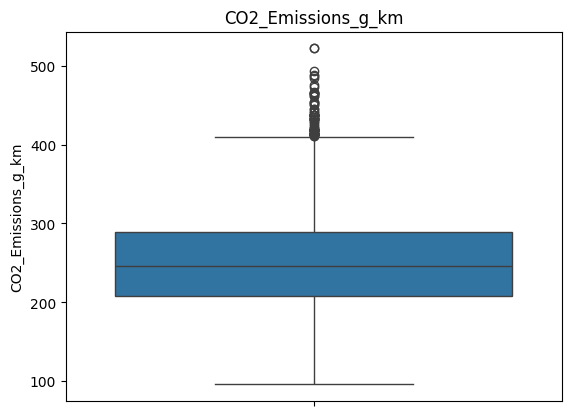

In [56]:
# check agin of the outliers
for col in numerical_cols:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [57]:
df

,Make,Vehicle Class,Engine_Size_L,Cylinders,Fuel Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km
0,ACURA,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,SUV - SMALL,2.0,4,Z,10.7,7.7,9.4,30,219
7381,VOLVO,SUV - SMALL,2.0,4,Z,11.2,8.3,9.9,29,232
7382,VOLVO,SUV - SMALL,2.0,4,Z,11.7,8.6,10.3,27,240
7383,VOLVO,SUV - STANDARD,2.0,4,Z,11.2,8.3,9.9,29,232


### Correlation

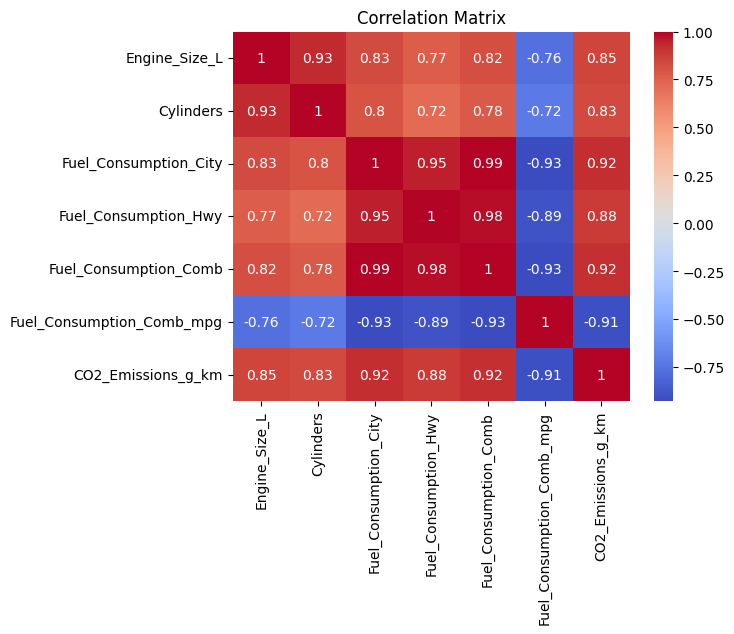

In [58]:
# Calculate correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Fuel_Consumption_Comb1 shows a strong negative correlation (less than -0.9) with CO2_Emissions, Fuel_Consumption_Comb, and Fuel_Consumption_City. CO2_Emissions exhibits a strong positive correlation (greater than 0.9) with both Fuel_Consumption_Comb and Fuel_Consumption_City.

#### Analysis of Categorical data

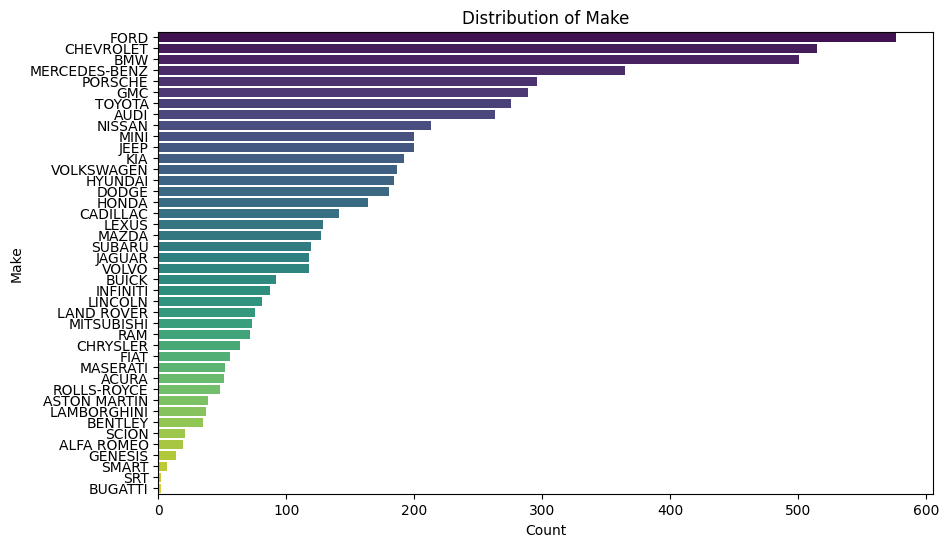

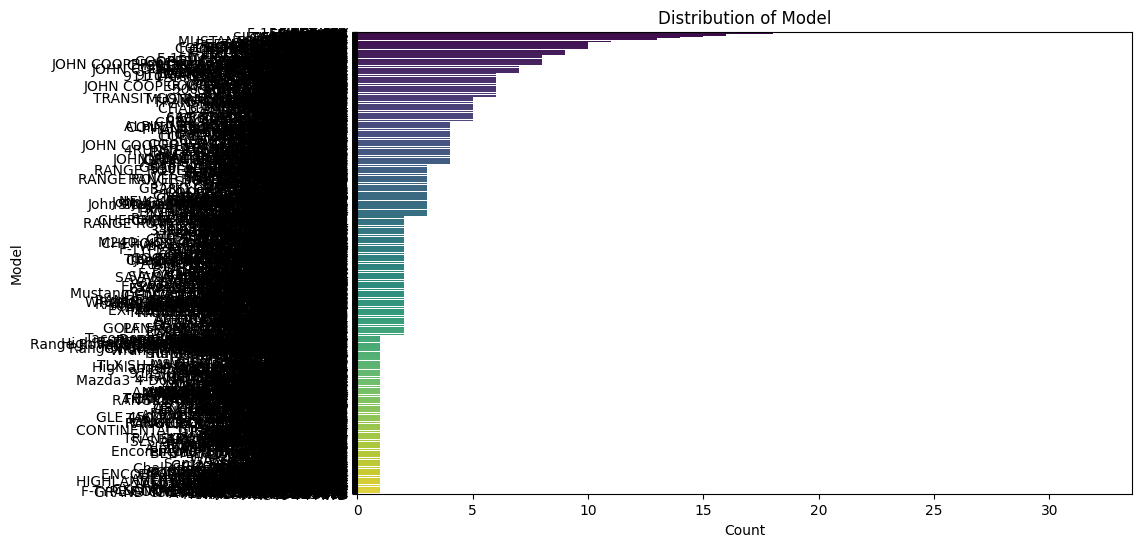

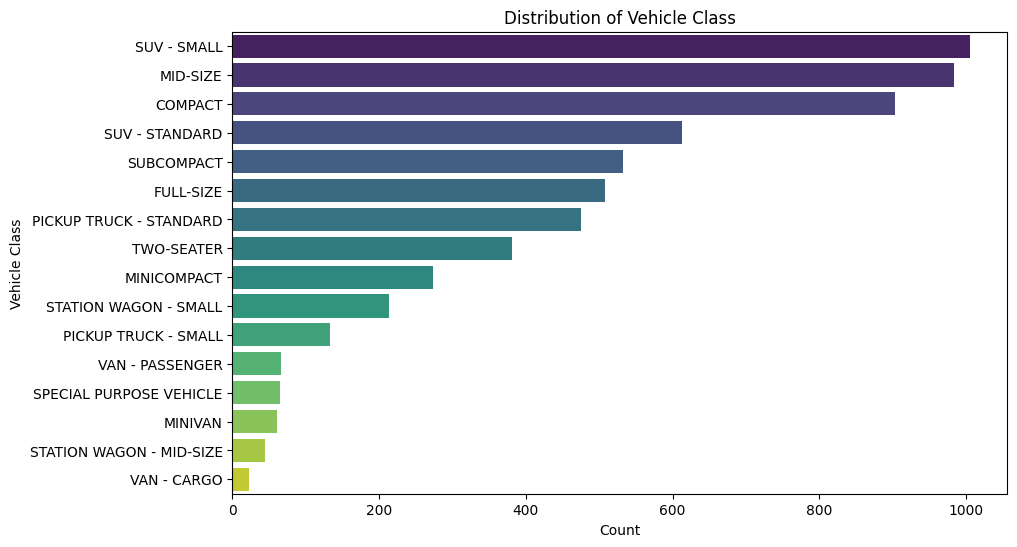

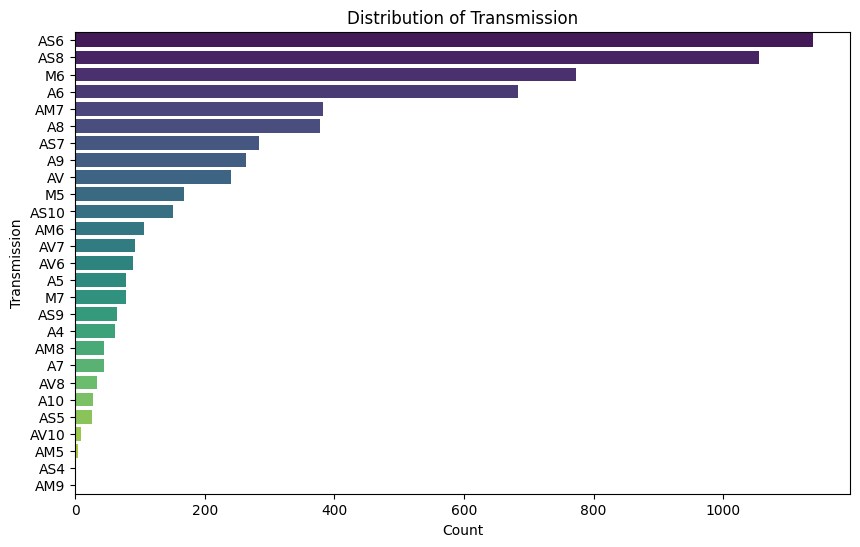

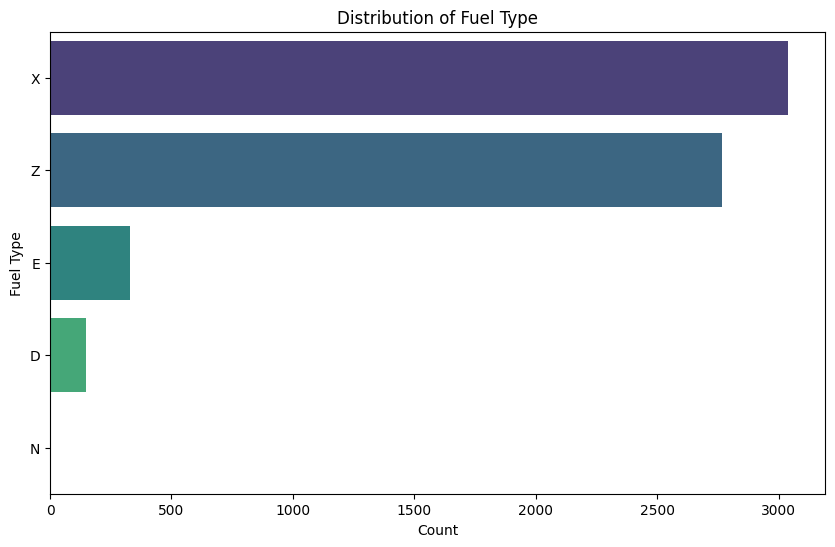

In [59]:
# visualize the object columns
for col in object_columns_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=object_columns_df, y=col, order=object_columns_df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

 as see above we have many unique values  ,
  we need feature engineering To streamline the modeling process, it is essential to simplify the categorical data by converting it into numerical format. This transformation will facilitate easier encoding and prepare the data effectively for modeling.

 ## Feature Engineering

1. ### Grouping Car Brands as make type

The goal is to reduce the complexity of the categorical variable by consolidating similar types into fewer groups, making it easier to handle in the modeling process. Here’s a breakdown of the rationale behind this transformation:

- **Sports Category**:  
  Brands like **BUGATTI**, **PORSCHE**, **MASERATI**, **ASTON MARTIN**, **LAMBORGHINI**, **JAGUAR**, and **SRT** are known for their high-performance sports cars. They are categorized under "Sports" due to their focus on speed, luxury, and exclusivity.

- **Premium Category**:  
  Brands such as **ALFA ROMEO**, **AUDI**, **BMW**, **BUICK**, **CADILLAC**, **CHRYSLER**, **DODGE**, **GMC**, **INFINITI**, **JEEP**, **LAND ROVER**, **LEXUS**, **MERCEDES-BENZ**, **MINI**, **SMART**, and **VOLVO** are positioned as premium brands. They offer a balance of luxury, performance, and advanced technology, targeting a higher-end market compared to general consumer brands.

- **Luxury Category**:  
  **ACURA**, **BENTLEY**, **LINCOLN**, **ROLLS-ROYCE**, and **GENESIS** are categorized as "Luxury" due to their focus on superior quality, craftsmanship, and exclusive features. These brands cater to the luxury segment of the market, often emphasizing comfort and status.

- **General Category**:  
  Brands like **CHEVROLET**, **FIAT**, **FORD**, **KIA**, **HONDA**, **HYUNDAI**, **MAZDA**, **MITSUBISHI**, **NISSAN**, **RAM**, **SCION**, **SUBARU**, **TOYOTA**, and **VOLKSWAGEN** are grouped as "General" because they primarily target the mass market with a wide range of affordable, reliable vehicles.


In [60]:
df['Make_Type'] = df['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR', 'SRT'], 'Sports')
df['Make_Type'] = df['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC',
                                           'INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ', 'MINI', 'SMART', 'VOLVO'], 'Premium')
df['Make_Type'] = df['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE', 'GENESIS'], 'Luxury')
df['Make_Type'] = df['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI',
                                           'NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN'], 'General')

In [61]:
# drop of make columns
df.drop('Make', axis=1, inplace=True)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

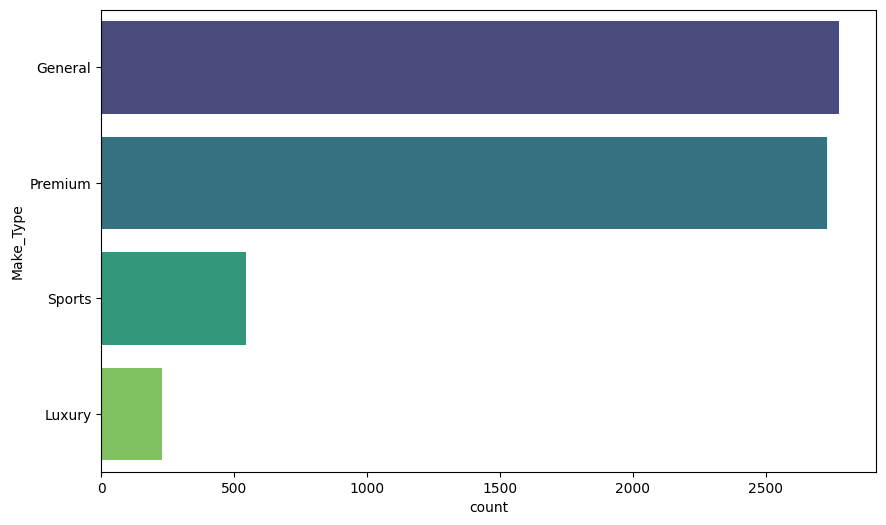

In [62]:
# visualize the make type column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Make_Type', order=df['Make_Type'].value_counts().index, palette='viridis')
plt

In [63]:
import plotly.express as px

# Create the box plot
fig = px.box(df, x='Make_Type', y='CO2_Emissions_g_km', title='CO2 Emissions by Vehicle Make',
             labels={'Make_Type': 'Make', 'CO2_Emissions_g_km': 'CO2 Emissions (g/km)'})

# Update the layout for better aesthetics
fig.update_layout(xaxis_title='Make', yaxis_title='CO2 Emissions (g/km)', xaxis_tickangle=-45)

# Show the plot
fig.show()


This shows that Luxury and Sports cars emit alot of  C02 emissions

Reasoning of transform vehicle class:

**The primary goal of this feature engineering** is to reduce the dimensionality and complexity of the 'Vehicle Class' column. By grouping similar vehicle types into broader categories, we can:

**Simplify the model**: A model with fewer distinct categories is often easier to train and interpret.
Improve generalization: By combining similar classes, we can reduce the risk of overfitting, leading to better performance on unseen data.

**some Reference**:Environmental Protection Agency (EPA): The EPA's fuel economy data often includes vehicle classifications

In [64]:
# Replacing 'Vehicle Class' column values with corresponding 'Vehicle_Class_Type' categories in the DataFrame df
df['Vehicle_Class_Type'] = df['Vehicle Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'], 'Sedan')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'], 'SUV')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')


In [65]:
# drop vehicle class column
df.drop('Vehicle Class', axis=1, inplace=True)

In [66]:
fig = px.box(df, x='Vehicle_Class_Type', y='CO2_Emissions_g_km', title='CO2 Emissions by Vehicle Class Type',
             labels={'Vehicle_Class_Type': 'Vehicle Class Type', 'CO2_Emissions_g_km': 'CO2 Emissions (g/km)'})

# Update the layout for better aesthetics
fig.update_traces(marker=dict(size=5), boxmean='sd')  # Display mean and standard deviation
fig.update_layout(
    xaxis_title='Vehicle Class Type',
    yaxis_title='CO2 Emissions (g/km)',
    xaxis_tickangle=-45,
    boxmode='group'  # Grouping boxes together for better comparison
)

# Show the plot
fig.show()

This Vehicle type show that Truck Emit a lot Co2 Emissions

## Transforming the Categorical into Numerical value

In [67]:
# Generating dummy variables for categorical features in the DataFrame df
df_dummies = pd.get_dummies(data=df[["Fuel Type","Make_Type", "Vehicle_Class_Type"]], drop_first=True)

# Selecting numerical features from the DataFrame df
df_num_features = df.select_dtypes(include=np.number)

# Concatenating the dummy variables with the numerical features
df = pd.concat([df_num_features, df_dummies], axis=1)

In [68]:
data = df

## Correlation of Dependaent variable to Target variable

In [69]:
# Calculate correlations with the target variable
correlations = df_num_features.corr()['CO2_Emissions_g_km']

# Remove the correlation of the target variable with itself
correlations = correlations.drop('CO2_Emissions_g_km')

# Print the correlations
print(correlations)


Engine_Size_L                0.854802
Cylinders                    0.834687
Fuel_Consumption_City        0.918756
Fuel_Consumption_Hwy         0.883424
Fuel_Consumption_Comb        0.916840
Fuel_Consumption_Comb_mpg   -0.906783
Name: CO2_Emissions_g_km, dtype: float64


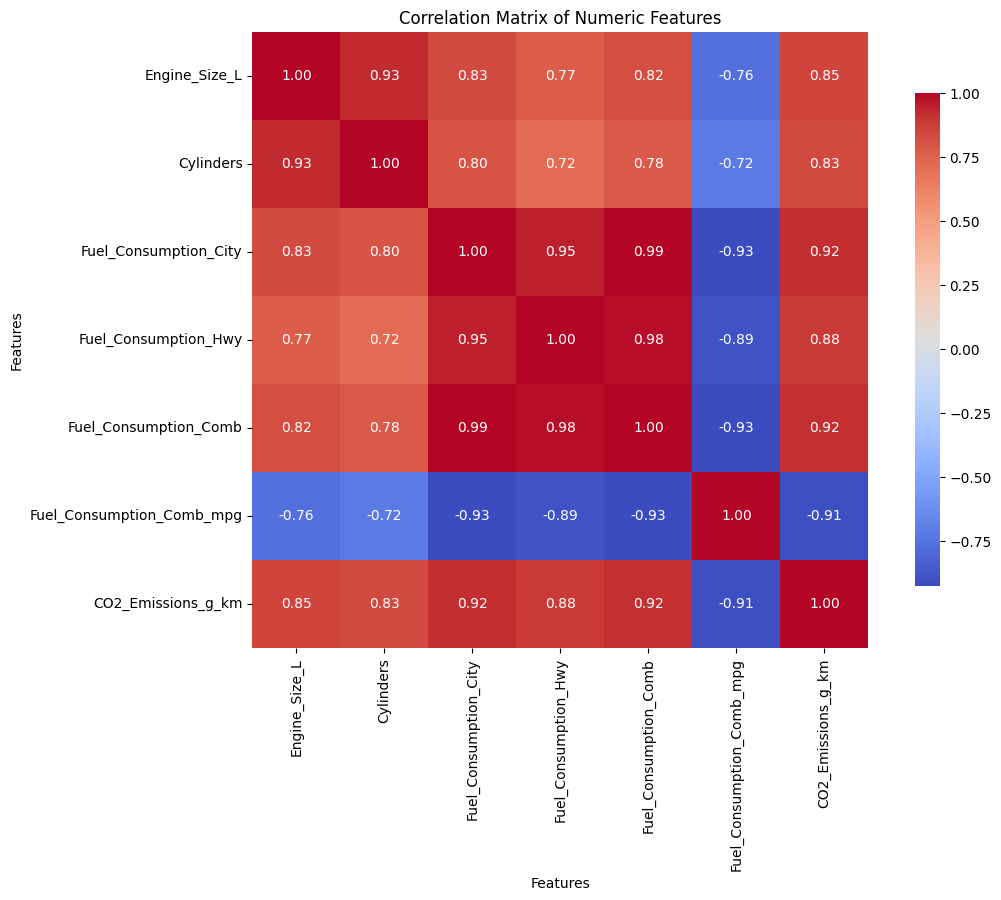

In [70]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_num_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, xticklabels=True, yticklabels=True)

# Set titles and labels
plt.title('Correlation Matrix of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()


In [71]:
# Number of features
num_features = len(df_num_features.columns) - 1  # Exclude 'CO2_Emissions_g_km'

# Create subplots
fig = make_subplots(rows=num_features, cols=1, shared_xaxes=True,
                    subplot_titles=[f'{feature} vs. CO2 Emissions' for feature in df_num_features.columns if feature != 'CO2_Emissions_g_km'])

# Add scatter plots to subplots
for i, feature in enumerate(df_num_features.columns):
    if feature != 'CO2_Emissions_g_km':
        fig.add_trace(
            go.Scatter(x=df_num_features[feature], y=df_num_features['CO2_Emissions_g_km'], mode='markers', name=feature),
            row=i + 1, col=1
        )

# Update layout
fig.update_layout(height=300 * num_features, title_text='Scatter Plots of Features vs. CO2 Emissions', showlegend=False)
fig.update_xaxes(title_text='Feature')
fig.update_yaxes(title_text='CO2 Emissions (g/km)')

# Show the figure
fig.show()


In [72]:
df

,Engine_Size_L,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,True,True,False,False,False,False,False
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,True,True,False,False,False,False,False
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,True,True,False,False,False,False,False
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,True,True,False,False,True,False,False
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,False,False,False,True,False,True,False,True,False,False
7381,2.0,4,11.2,8.3,9.9,29,232,False,False,False,True,False,True,False,True,False,False
7382,2.0,4,11.7,8.6,10.3,27,240,False,False,False,True,False,True,False,True,False,False
7383,2.0,4,11.2,8.3,9.9,29,232,False,False,False,True,False,True,False,True,False,False


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Engine_Size_L              6282 non-null   float64
 1   Cylinders                  6282 non-null   int64  
 2   Fuel_Consumption_City      6282 non-null   float64
 3   Fuel_Consumption_Hwy       6282 non-null   float64
 4   Fuel_Consumption_Comb      6282 non-null   float64
 5   Fuel_Consumption_Comb_mpg  6282 non-null   int64  
 6   CO2_Emissions_g_km         6282 non-null   int64  
 7   Fuel Type_E                6282 non-null   bool   
 8   Fuel Type_N                6282 non-null   bool   
 9   Fuel Type_X                6282 non-null   bool   
 10  Fuel Type_Z                6282 non-null   bool   
 11  Make_Type_Luxury           6282 non-null   bool   
 12  Make_Type_Premium          6282 non-null   bool   
 13  Make_Type_Sports           6282 non-null   bool   
 1

In [74]:
# change bool column dtype into integer type
for col in df.select_dtypes(include=['bool']):
    df[col] = df[col].astype(int)

In [75]:
# check again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Engine_Size_L              6282 non-null   float64
 1   Cylinders                  6282 non-null   int64  
 2   Fuel_Consumption_City      6282 non-null   float64
 3   Fuel_Consumption_Hwy       6282 non-null   float64
 4   Fuel_Consumption_Comb      6282 non-null   float64
 5   Fuel_Consumption_Comb_mpg  6282 non-null   int64  
 6   CO2_Emissions_g_km         6282 non-null   int64  
 7   Fuel Type_E                6282 non-null   int64  
 8   Fuel Type_N                6282 non-null   int64  
 9   Fuel Type_X                6282 non-null   int64  
 10  Fuel Type_Z                6282 non-null   int64  
 11  Make_Type_Luxury           6282 non-null   int64  
 12  Make_Type_Premium          6282 non-null   int64  
 13  Make_Type_Sports           6282 non-null   int64  
 1

### Modeling Process

Importing neccesary Libaries of Scikit Learn

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

Splitting the data into  Independent(X)   and  Dependent Variables(target Variables)(Y)

In [77]:
# split up data
X = df.drop('CO2_Emissions_g_km', axis=1)
y = df['CO2_Emissions_g_km']

In [78]:
X.shape,y.shape

((6282, 16), (6282,))

Scaling Data  for equal Contribution  in Modelling Process

In [79]:
# Normalization of the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [80]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [81]:
# fit and train data
lreg = LinearRegression()
lreg.fit(X_train, y_train)


LinearRegression()

In [82]:
# predict and evaluate
y_pred = lreg.predict(X_test)

In [83]:
# evaluate  and display
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error for Linear reg (MSE): {mse:.2f}")
print(f"Mean Absolute Error  Linear reg (MAE): {mae:.2f}")
print(f"R-squared (R2) Linear reg: {r2:.2f}")

Mean Squared Error for Linear reg (MSE): 38.83
Mean Absolute Error  Linear reg (MAE): 3.33
R-squared (R2) Linear reg: 0.99


In [84]:
# comparison of actual and predicted value
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df

,Actual,Predicted
3003,322,308.646223
5970,242,244.765930
2394,300,296.676370
6020,275,272.623987
3416,245,245.310310
...,...,...
6249,197,195.303166
2571,220,219.397144
3162,303,301.580008
2459,195,193.809645


In [85]:
display(mse, mae, r2)

38.830186503662276

3.3344054887923837

0.9892399056103529

Ridge

In [86]:
# fit and train ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# predict and evaluate
y_pred_ridge = ridge.predict(X_test)

In [87]:
# evaluate  and display
mse = mean_squared_error(y_test, y_pred_ridge )
mae = mean_absolute_error(y_test, y_pred_ridge )
r2 = r2_score(y_test, y_pred_ridge )

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 38.54
Mean Absolute Error (MAE): 3.45
R-squared (R2): 0.99


In [88]:
# comparison of actual and predicted value
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge })
comparison_df

,Actual,Predicted
3003,322,306.113185
5970,242,245.476758
2394,300,295.905252
6020,275,273.493927
3416,245,246.114881
...,...,...
6249,197,195.567862
2571,220,218.951658
3162,303,301.567995
2459,195,193.362475


Since means both Linear and Ridge Regression have R2 of 1   show that models perfectly explain the variance in the target variable, which is often an indication of overfitting if the dataset is not extremely well-behaved or if this is on training data.

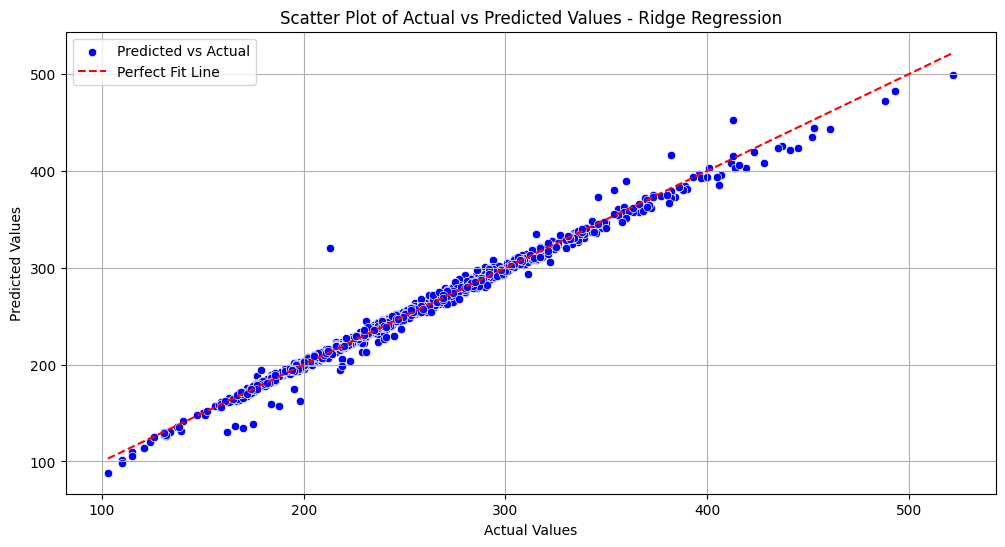

In [89]:
# Scatter Plot of Actual vs. Predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values - Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

##### Cross Validation and Hyper parameter Tunning

Cross-validation includes resampling and sample splitting methods that use different portions of the data to test and train a model on different iterations.

a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting
![image.png](attachment:image.png)

We are using **KFOLD Cross Validation**


**Hyperparameter tuning** is the process of selecting the optimal set of hyperparameters for a machine learning model. It is an important step in the model development process, as the choice of hyperparameters can have a significant impact on the model's performance.


In [90]:
# Define cross-validation strategy: 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the Ridge model with a pipeline for scaling
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('ridge', Ridge())  # Ridge regression model
])

# Define hyperparameters for Ridge regression
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
}

# Perform GridSearchCV with Ridge regression
ridge_grid = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error')
ridge_grid.fit(X, y)

# Display the best parameters and scores
print(f'Best Ridge Parameters: {ridge_grid.best_params_}')
print(f'Best Ridge MSE (Cross-Validated): {-ridge_grid.best_score_}')

Best Ridge Parameters: {'ridge__alpha': 0.1}
Best Ridge MSE (Cross-Validated): 28.549890605704782


In [91]:
# Evaluate the best model on the entire dataset
best_ridge = ridge_grid.best_estimator_
y_pred = best_ridge.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Ridge MSE: {mse}')
print(f'Ridge MAE: {mae}')
print(f'Ridge R2: {r2}')

# Cross-validation scores for the best model
cv_scores = cross_val_score(best_ridge, X, y, cv=kf, scoring='neg_mean_squared_error')

# Display Cross-Validation scores
print(f'Cross-Validation MSE Scores: {-cv_scores}')
print(f'Average Cross-Validation MSE: {-cv_scores.mean()}')

Ridge MSE: 26.266798569437235
Ridge MAE: 3.1318867040682496
Ridge R2: 0.9925267908935125
Cross-Validation MSE Scores: [38.70383262 29.09318802 29.53966405 23.67231178 21.74045656]
Average Cross-Validation MSE: 28.549890605704782


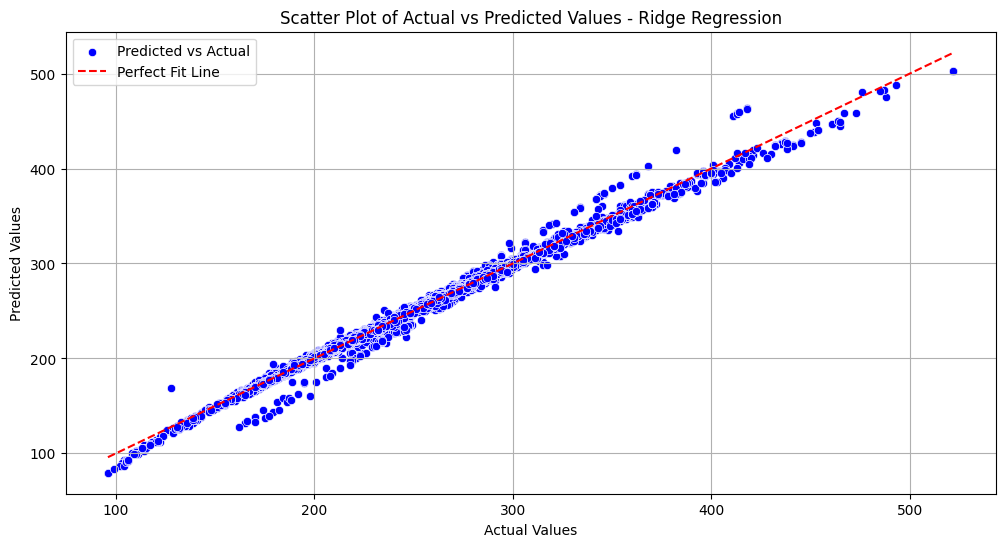

In [92]:
# Scatter Plot of Actual vs Predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values - Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# comparison of actual and predicted value
comparison_df = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred
})

comparison_df.head()

,Actual,Predicted
0,196,199.456517
1,221,225.586118
2,136,134.913907
3,255,262.039241
4,244,250.273921


To Compare The Best Model Use Between  Ridge Model  and  Best Ridge Model (After Hyperparameter Tuning with alpha=0.1)

 the tuned model showed an average MSE of 12.84, demonstrating how the model performs across multiple folds of data, reflecting its generalization capability.
 If consistency and avoiding overfitting are priorities, especially for deployment, the tuned Ridge model (alpha=0.1) is the better choice despite its slightly lower R² score on the entire dataset

## Lazy Predict
Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning

In [94]:
!pip install lazypredict scikit-learn


In [95]:
!pip install scikit-learn==0.24.2 lazypredict


  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [96]:
!git clone https://github.com/shankarpandala/lazypredict.git


fatal: destination path 'lazypredict' already exists and is not an empty directory.


In [97]:
!sed -i 's/sparse=False/sparse_output=False/g' lazypredict/lazypredict/Supervised.py

In [98]:
!pip install -e lazypredict/


Obtaining file:///content/lazypredict
  Preparing metadata (setup.py) ... done
  Attempting uninstall: lazypredict
    Found existing installation: lazypredict 0.2.12
    Uninstalling lazypredict-0.2.12:
      Successfully uninstalled lazypredict-0.2.12
  Running setup.py develop for lazypredict


In [99]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [100]:
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)


100%|██████████| 42/42 [01:03<00:00,  1.51s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 5025, number of used features: 15
[LightGBM] [Info] Start training from score 250.806169


In [101]:
print(models)


                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.99       0.99   4.47   
XGBRegressor                                 0.99       0.99   4.50   
HistGradientBoostingRegressor                0.99       0.99   4.68   
RandomForestRegressor                        0.99       0.99   4.72   
LGBMRegressor                                0.99       0.99   4.77   
GradientBoostingRegressor                    0.99       0.99   4.92   
BaggingRegressor                             0.99       0.99   4.97   
DecisionTreeRegressor                        0.99       0.99   5.03   
PoissonRegressor                             0.99       0.99   5.08   
ExtraTreeRegressor                           0.99       0.99   5.24   
KNeighborsRegressor                          0.99       0.99   6.07   
LassoCV                                      0.99       0.99   6.18   
SGDReg

In [102]:
# Data for the top five models
data_top_five = {
    'Model': [
        'ExtraTreesRegressor',
        'XGBRegressor',
        'HistGradientBoostingRegressor',
        'RandomForestRegressor',
        'LGBMRegressor'
    ],
    'RMSE': [4.47, 4.50, 4.68, 4.72, 4.77],
    'R²': [0.99, 0.99, 0.99, 0.99, 0.99],
    'Time Taken (s)': [2.51, 1.27, 0.39, 4.89, 0.26]
}

# Creating the DataFrame
model_comparison_df = pd.DataFrame(data_top_five)
model_comparison_df


In [103]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Create a subplot with 3 rows and 1 column
# fig = make_subplots(rows=3, cols=1,
#                     subplot_titles=("Top 5 Models Comparison - RMSE",
#                                     "Top 5 Models Comparison - R²",
#                                     "Top 5 Models Comparison - Time Taken"),
#                     vertical_spacing=0.1)  # Adjust space between plots

# # RMSE Bar chart
# fig.add_trace(go.Bar(x=model_comparison_df['Model'], y=model_comparison_df['RMSE'],
#                      name='RMSE', marker_color='lightskyblue'),
#               row=1, col=1)

# # R² Bar chart
# fig.add_trace(go.Bar(x=model_comparison_df['Model'], y=model_comparison_df['R²'],
#                      name='R²', marker_color='lightgreen'),
#               row=2, col=1)

# # Time Taken Bar chart
# fig.add_trace(go.Bar(x=model_comparison_df['Model'], y=model_comparison_df['Time Taken (s)'],
#                      name='Time Taken', marker_color='lightcoral'),
#               row=3, col=1)

# # Update layout
# fig.update_layout(title='Top 5 Models Comparison',
#                   height=900,  # Adjust overall height
#                   showlegend=False)

# # Show the plot
# fig.show()


Best Overall Performance: Based on both R-Squared and RMSE, the XGBRegressor is the best model. It has the lowest RMSE (4.48) and excellent R-Squared (0.99).

## XBGRegressor
Hyperparameter Tunning

In [104]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

 Define the parameter grid

In [105]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}


In [106]:
# Initialize the model
xgb = XGBRegressor()

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100, # Number of combinations to try
    cv=5, # 5-fold cross-validation
    verbose=1, # To show progress
    random_state=42,
    n_jobs=-1 # Use all available cores
)


In [107]:
# Fit the model
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=1)

In [108]:
print("Best parameters found: ", random_search.best_params_)
print("Best R-squared score: ", random_search.best_score_)


Best parameters found:  {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best R-squared score:  0.9970492959022522


In [109]:
# Evaluate the model on the test set
best_xgb = random_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Calculate R-Squared or RMSE
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared on test set: {r2}")
print(f"RMSE on test set: {rmse}")


R-squared on test set: 0.9948499202728271
RMSE on test set: 4.311051366927998


In [110]:
pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

,Predicted,Actual
3003,307.78,322
5970,243.37,242
2394,297.75,300
6020,272.42,275
3416,244.45,245
...,...,...
6249,196.61,197
2571,218.30,220
3162,299.52,303
2459,191.78,195


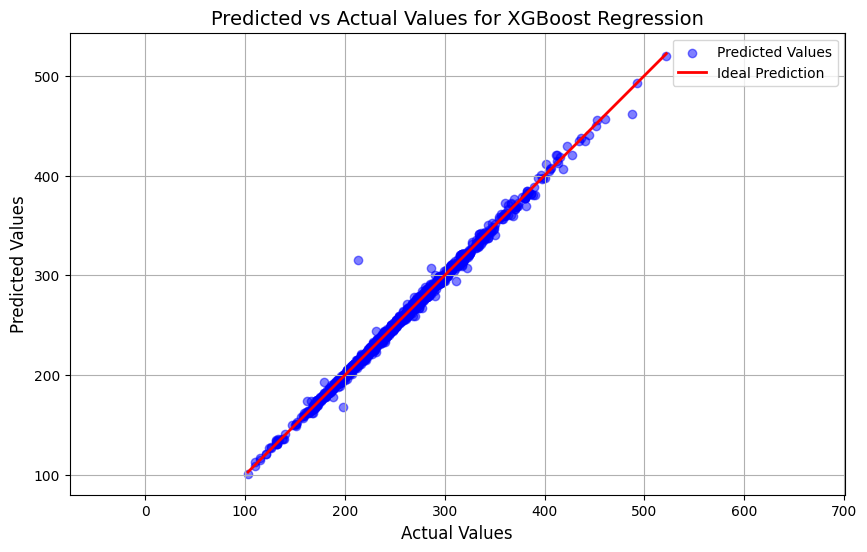

In [111]:
# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Predicted vs Actual Values for XGBoost Regression', fontsize=14)
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling
plt.show()


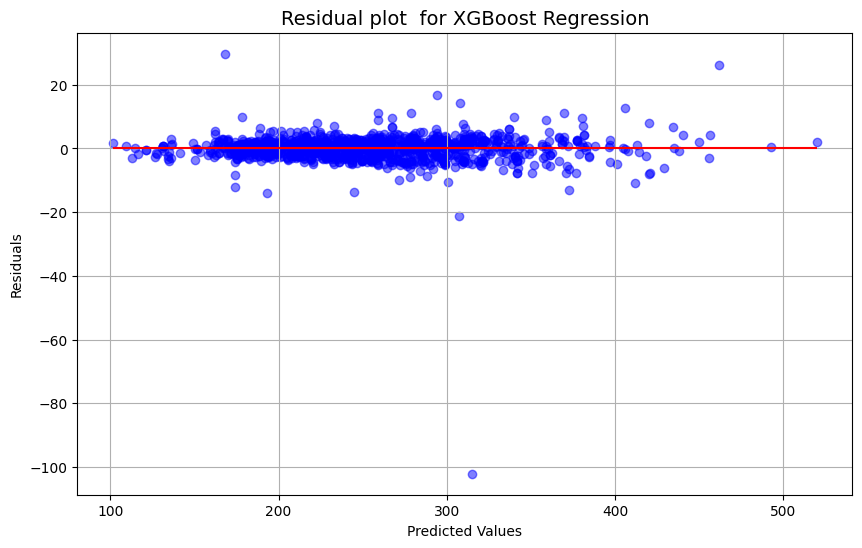

In [112]:
# residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Residual plot  for XGBoost Regression', fontsize=14)
plt.grid(True)
plt.show()

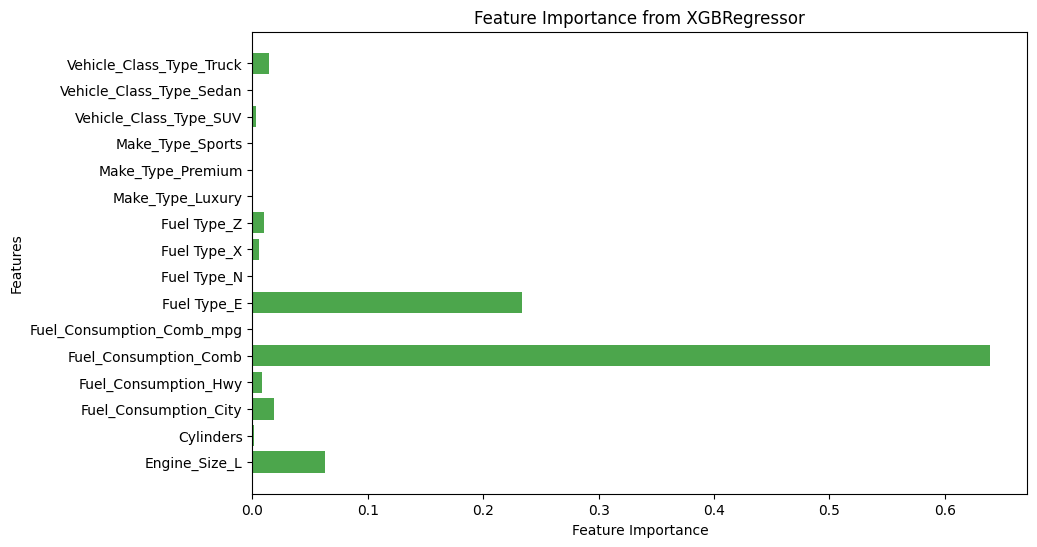

In [113]:
features = X.columns  # Retrieve column names from the original DataFrame

# Plot the Feature Importance again
importances = best_xgb.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(features, importances, color='green', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from XGBRegressor')
plt.show()


KeyError: 'Learning Rate'

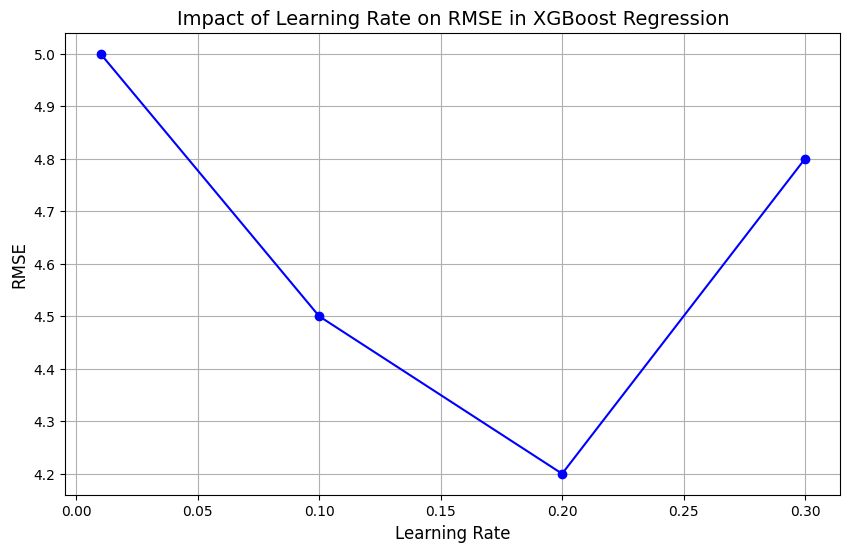

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample hyperparameter tuning results
data1 = {
    'Learning Rate': [0.01, 0.1, 0.2, 0.3],
    'RMSE': [5.0, 4.5, 4.2, 4.8]
}

# Creating a DataFrame
df1 = pd.DataFrame(data1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df1['Learning Rate'], df1['RMSE'], marker='o', linestyle='-', color='blue')
plt.title('Impact of Learning Rate on RMSE in XGBoost Regression', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.grid()
plt.xticks(df['Learning Rate'])
plt.show()


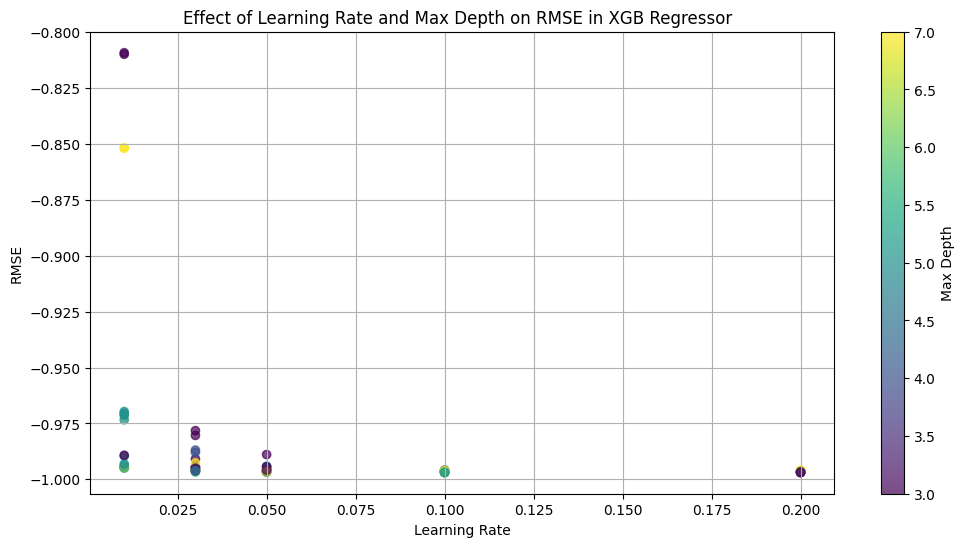

In [130]:
# Collect metrics for visualization
results = {
    'Learning Rate': [],
    'Max Depth': [],
    'RMSE': []
}

# Iterate through results to collect data
for param, rmse in zip(random_search.cv_results_['params'],
                       random_search.cv_results_['mean_test_score']):
    results['Learning Rate'].append(param['learning_rate'])
    results['Max Depth'].append(param['max_depth'])
    results['RMSE'].append(-rmse)

# Create DataFrame
df_results = pd.DataFrame(results)

# Visualize RMSE for different Learning Rates and Max Depths
plt.figure(figsize=(12, 6))
plt.scatter(df_results['Learning Rate'], df_results['RMSE'], c=df_results['Max Depth'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Max Depth')
plt.title('Effect of Learning Rate and Max Depth on RMSE in XGB Regressor  ')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.grid()
plt.show()


Saving Model for Depolyment

In [116]:

# Save the trained model using joblib
import joblib
joblib_filename = 'best_xgb_model.pkl'
joblib.dump(best_xgb, joblib_filename)

print(f'Model saved as {joblib_filename}')

Model saved as best_xgb_model.pkl


In [117]:
from google.colab import files

# Download the model file
files.download(joblib_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
import sklearn
print(sklearn.__version__)

1.5.2


## Generative the data Randomly for practice of Geospatial Integration

In [119]:
import pandas as pd
import numpy as np

# Existing vehicle emissions DataFrame with 6282 rows
vehicle_data = pd.DataFrame({
    'Engine_Size_L': np.random.uniform(1.0, 6.0, 6282),  # Random engine sizes between 1L to 6L
    'Cylinders': np.random.randint(1, 12, 6282),  # Random number of cylinders between 1 and 12
    'Fuel_Consumption_City': np.random.uniform(5.0, 15.0, 6282),  # Random fuel consumption city values
    'Fuel_Consumption_Hwy': np.random.uniform(4.0, 12.0, 6282),  # Random fuel consumption highway values
    'Fuel_Consumption_Comb': np.random.uniform(4.0, 15.0, 6282),  # Random combined fuel consumption values
    'Fuel_Consumption_Comb_mpg': np.random.randint(10, 30, 6282),  # Random mpg values
    'CO2_Emissions_g_km': np.random.randint(80, 150, 6282),  # Random CO2 emissions values
    'Fuel Type_E': np.random.randint(0, 2, 6282),  # Random binary fuel type indicator
    'Fuel Type_N': np.random.randint(0, 2, 6282),  # Random binary fuel type indicator
    'Fuel Type_X': np.random.randint(0, 2, 6282),  # Random binary fuel type indicator
    'Fuel Type_Z': np.random.randint(0, 2, 6282),  # Random binary fuel type indicator
    'Make_Type_Luxury': np.random.randint(0, 2, 6282),  # Random binary luxury make indicator
    'Make_Type_Premium': np.random.randint(0, 2, 6282),  # Random binary premium make indicator
    'Make_Type_Sports': np.random.randint(0, 2, 6282),  # Random binary sports make indicator
    'Vehicle_Class_Type_SUV': np.random.randint(0, 2, 6282),  # Random binary SUV class indicator
    'Vehicle_Class_Type_Sedan': np.random.randint(0, 2, 6282),  # Random binary sedan class indicator
    'Vehicle_Class_Type_Truck': np.random.randint(0, 2, 6282),  # Random binary truck class indicator
})

# Generate random geospatial data
num_rows = vehicle_data.shape[0]
latitude = np.random.uniform(-90.0, 90.0, num_rows)  # Random latitudes
longitude = np.random.uniform(-180.0, 180.0, num_rows)  # Random longitudes
region = np.random.choice(['Urban', 'Suburban', 'Rural'], num_rows)  # Random regions
population_density = np.random.randint(100, 10000, num_rows)  # Random population densities

# Create a DataFrame for the geospatial data
geospatial_data = pd.DataFrame({
    'Latitude': latitude,
    'Longitude': longitude,
    'Region': region,
    'Population_Density': population_density,
})

# Merge the two DataFrames
merged_data = pd.concat([vehicle_data, geospatial_data], axis=1)

# Display the first few rows of the merged DataFrame
merged_data.head()



,Engine_Size_L,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,Fuel Type_E,Fuel Type_N,Fuel Type_X,...,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck,Latitude,Longitude,Region,Population_Density
0,4.48,7,7.74,6.56,5.41,27,130,0,1,0,...,1,1,1,0,0,0,-11.92,-110.64,Rural,510
1,5.46,1,12.90,10.82,4.54,17,88,1,0,0,...,0,0,1,0,1,1,-29.71,-54.05,Rural,5964
2,2.28,2,11.68,6.54,14.12,18,116,0,1,1,...,0,0,1,0,0,0,-52.31,-73.28,Suburban,4800
3,5.42,11,5.82,9.01,10.86,27,144,0,1,0,...,1,1,0,0,1,1,-45.76,80.42,Urban,9824
4,4.49,10,8.72,7.53,8.05,20,82,0,0,0,...,1,0,1,0,1,0,-15.68,-110.45,Suburban,6382


In [120]:
data

,Engine_Size_L,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.00,4,9.90,6.70,8.50,33,196,0,0,0,1,1,0,0,0,0,0
1,2.40,4,11.20,7.70,9.60,29,221,0,0,0,1,1,0,0,0,0,0
2,1.50,4,6.00,5.80,5.90,48,136,0,0,0,1,1,0,0,0,0,0
3,3.50,6,12.70,9.10,11.10,25,255,0,0,0,1,1,0,0,1,0,0
4,3.50,6,12.10,8.70,10.60,27,244,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.00,4,10.70,7.70,9.40,30,219,0,0,0,1,0,1,0,1,0,0
7381,2.00,4,11.20,8.30,9.90,29,232,0,0,0,1,0,1,0,1,0,0
7382,2.00,4,11.70,8.60,10.30,27,240,0,0,0,1,0,1,0,1,0,0
7383,2.00,4,11.20,8.30,9.90,29,232,0,0,0,1,0,1,0,1,0,0


In [121]:
# Generating random latitudes and longitudes
np.random.seed(42)  # To ensure reproducibility

# Assuming the full dataset has 6282 rows
num_rows = 6282

# Generate random Latitude and Longitude values
latitude = np.random.uniform(low=-90.0, high=90.0, size=num_rows)
longitude = np.random.uniform(low=-180.0, high=180.0, size=num_rows)

# Create a DataFrame for the geospatial data
geo_data = pd.DataFrame({
    'Latitude': latitude,
    'Longitude': longitude
})

df_full = pd.concat([df, geo_data], axis=1)

# Display the merged dataframe
df_full.head()


,Engine_Size_L,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck,Latitude,Longitude
0,2.00,4.00,9.90,6.70,8.50,33.00,196.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-22.58,94.39
1,2.40,4.00,11.20,7.70,9.60,29.00,221.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,81.13,76.90
2,1.50,4.00,6.00,5.80,5.90,48.00,136.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,41.76,-105.30
3,3.50,6.00,12.70,9.10,11.10,25.00,255.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,17.76,24.77
4,3.50,6.00,12.10,8.70,10.60,27.00,244.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,-61.92,132.38


In [127]:
# Taking a random sample of 10 rows from df_full
random_data = df_full.sample(n=10, random_state=42)

# Saving the random 10 rows to a CSV file
random_data.to_csv('random_test_data.csv', index=False)
files.download('random_test_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>